In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Lit le fichier csv (+ quelques options qui font que normalement ça va un peu plus vite)
df = pd.read_csv("train.csv",engine='c',memory_map=True,nrows=1000)
dfTest = pd.read_csv("test.csv",engine='c',memory_map=True,nrows=1000)

# Supprime les lignes qui contiennent une donnée manquante
df.dropna(inplace=True)

# Supprime les données dupliquées
df.drop_duplicates(inplace=True)

#Supprime les colonnes qui ne sont pas utile pour le modèle.
#Il doit y avoir un moyen de le faire directement dans la lecture du fichier mais je ne l'ai pas trouvé. Il y a le
#paramètre <names> pour la fonction read_csv qui prend la liste des colonnes à lire, mais quand je l'utilise, le résultat
#que j'obtient est bizarre. Pour l'instant ça, ça marche
#Cette n'est même pas vraiment utile
#df.drop(['id', 'vendor_id','dropoff_datetime','store_and_fwd_flag'],axis=1,inplace=True)

#Convertion des dates dans un format normalisé
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

#extraction de données
df.loc[:, "date"] = df.pickup_datetime.dt.date
df.loc[:, "time"] = df.pickup_datetime.dt.time
df.loc[:, "dayOfTheWeek"] = df.pickup_datetime.dt.dayofweek
df.loc[:, "WeekOfTheYear"] = df.pickup_datetime.dt.weekofyear

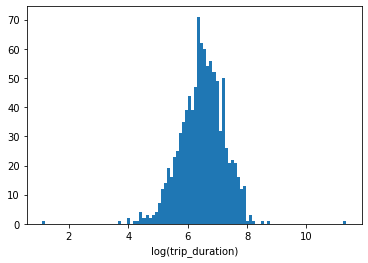

In [4]:
#Diagramme affichant le temps des voyages
#On prend le log car sinon les valeur sont trop grandes
plt.hist(np.log(df.trip_duration.values), bins=100)
plt.xlabel('log(trip_duration)')
plt.show()

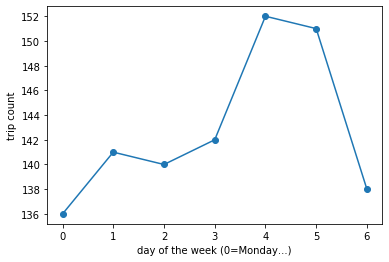

In [5]:
#Diagramme affichant le nombre de voyages par jour de la semaine
plt.plot(df.groupby('dayOfTheWeek').count()[['id']],'o-')
plt.xlabel("day of the week (0=Monday...)")
plt.ylabel("trip count")
plt.show()

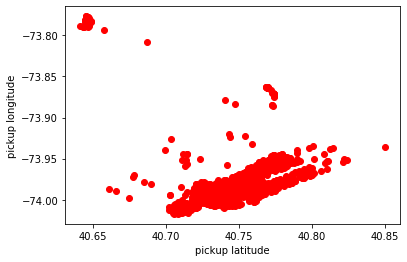

In [6]:
#Diagramme affichant les lieux de départ
plt.plot(df.pickup_latitude,df.pickup_longitude,'ro')
plt.xlabel("pickup latitude")
plt.ylabel("pickup longitude")
plt.show()

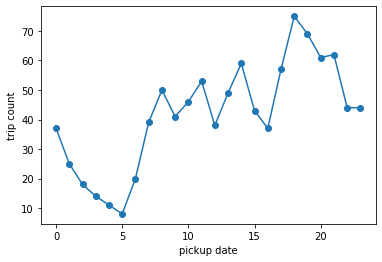

In [7]:
#Diagramme affichant le nombre de départ en fonction de l'heure de la journée
plt.plot(df.groupby(df.pickup_datetime.dt.hour.values).count()[['id']],'o-')
plt.xlabel("pickup date")
plt.ylabel("trip count")
plt.show()

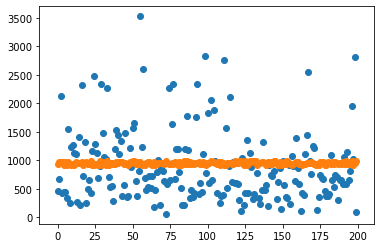

In [34]:
# numpy.reshape (ligne, colonne)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

df['pickup_datetime'] = pd.to_numeric(df.pickup_datetime)

X = df[['vendor_id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].values
Y = df['trip_duration'].values

XTrain, XTest, YTrain, Ytest = train_test_split(X,Y,train_size=800)

reg = LinearRegression().fit(XTrain, YTrain)
YPredict = reg.predict(XTest)

plt.scatter(x=np.arange(200),y=YTest)
plt.scatter(x=np.arange(200),y=YPredict)
plt.show()